# **IRIS FLOWERS CLASSIFICATION ML PROJECT**

# **Introduction**

Iris dataset is the Hello World for the Data Science, so if you have started your career in Data Science and Machine Learning you will be practicing basic ML algorithms on this famous dataset. Iris dataset contains five columns such as Petal Length, Petal Width, Sepal Length, Sepal Width and Species Type.

Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded digitally

The iris dataset contains the following data

50 samples of 3 different species of iris (150 samples total)

There are 50 observations of each species for a total of 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).

Measurements: sepal length, sepal width, petal length, petal width

The format for the data: (sepal length, sepal width, petal length, petal width)
The 4 features are
1.SepalLengthCm

2.SepalWidthCm

3.PetalLengthCm

4.PetalWidthCm

The target class
The flower species type is the target class and it having 3 types

1.Setosa

2.Versicolor

3.Virginica

# **Loading Data**

In [ ]:
# Read data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# style
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **EDA(Exploratory Data Analysis)**

# **Variables**

In [ ]:
df = pd.read_csv('/content/IRIS.csv')

In [ ]:

display(df.head())
display(df.tail())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica
53,5.5,2.3,4.0,1.3,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
46,5.1,3.8,1.6,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
68,6.2,2.2,4.5,1.5,Iris-versicolor


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print('Iris-setosa')
setosa = df['species'] == 'Iris-setosa'
print(df[setosa].describe())

print('\nIris-versicolor')
versicolor = df['species'] == 'Iris-versicolor'
print(df[versicolor].describe())

print('\nIris-virginica')
virginica = df['species'] == 'Iris-virginica'
print(df[virginica].describe())


Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

Iris-versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        

# **Sepal_Length**

     sepal_length
5.0            10
5.1             9
6.3             9
5.7             8
6.7             8
5.8             7
5.5             7
6.4             7
4.9             6
5.4             6
6.1             6
6.0             6
5.6             6
4.8             5
6.5             5
6.2             4
7.7             4
6.9             4
4.6             4
5.2             4
5.9             3
4.4             3
7.2             3
6.8             3
6.6             2
4.7             2
7.6             1
7.4             1
7.3             1
7.0             1
7.1             1
5.3             1
4.3             1
4.5             1
7.9             1


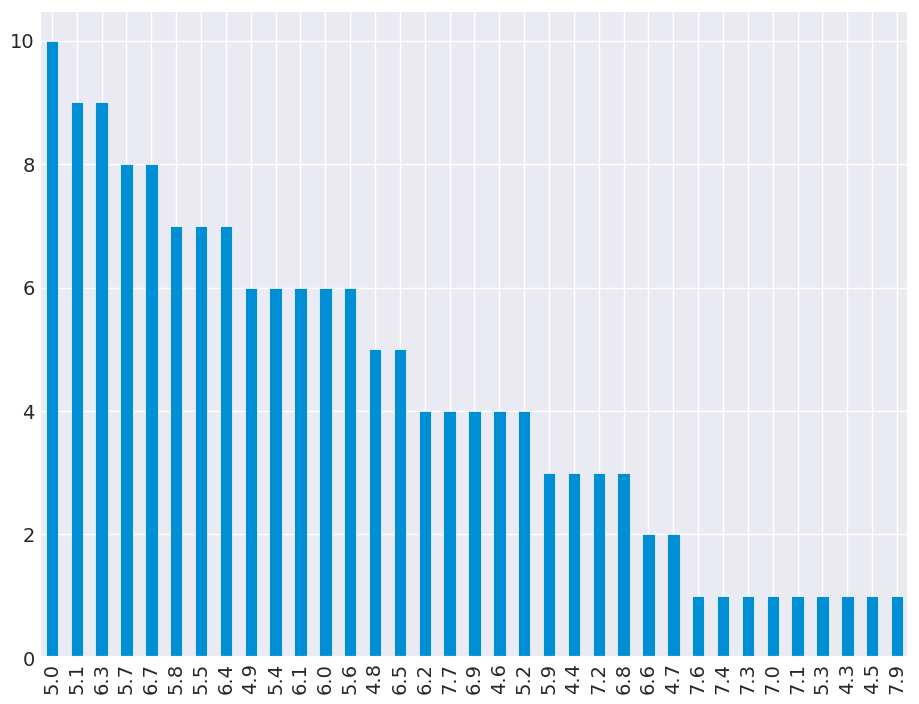

In [ ]:
df['sepal_length'].nunique()
plt.figure(figsize=(10,8))
print(df['sepal_length'].value_counts().to_frame())
df['sepal_length'].value_counts().plot.bar()
plt.show()

# **Sepal_width**

     sepal_width
3.0           26
2.8           14
3.2           13
3.1           12
3.4           12
2.9           10
2.7            9
2.5            8
3.5            6
3.3            6
3.8            6
2.6            5
2.3            4
3.7            3
2.4            3
2.2            3
3.6            3
3.9            2
4.4            1
4.0            1
4.1            1
4.2            1
2.0            1


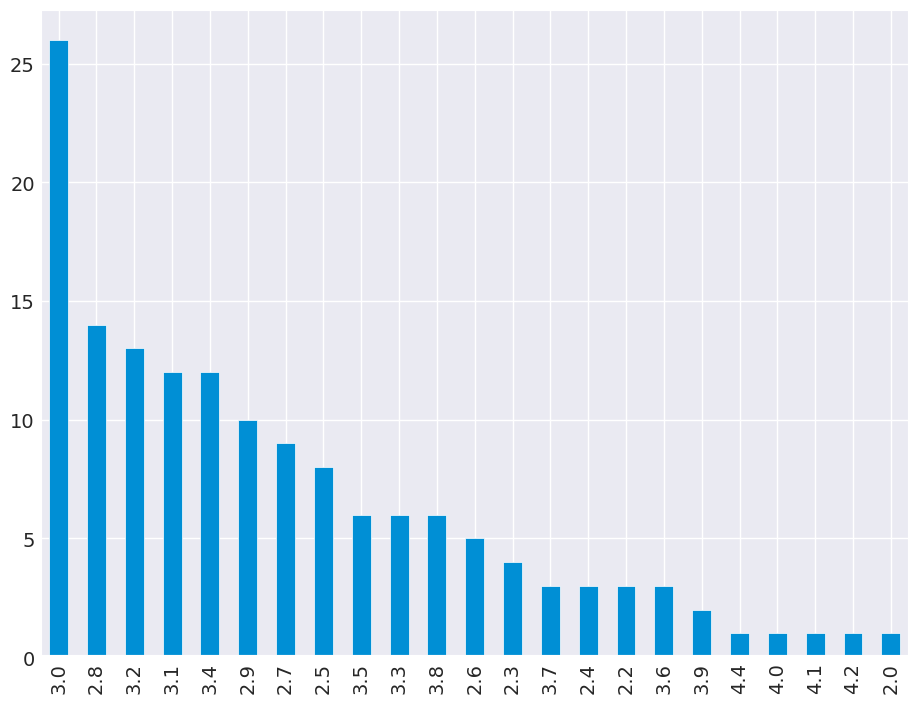

In [ ]:
df['sepal_width'].nunique()
plt.figure(figsize=(10,8))
print(df['sepal_width'].value_counts().to_frame())
df['sepal_width'].value_counts().plot.bar()
plt.show()

# **Petal_length**

     petal_length
1.5            14
1.4            12
5.1             8
4.5             8
1.6             7
1.3             7
5.6             6
4.7             5
4.9             5
4.0             5
4.2             4
5.0             4
4.4             4
4.8             4
1.7             4
3.9             3
4.6             3
5.7             3
4.1             3
5.5             3
6.1             3
5.8             3
3.3             2
5.4             2
6.7             2
5.3             2
5.9             2
6.0             2
1.2             2
4.3             2
1.9             2
3.5             2
5.2             2
3.0             1
1.1             1
3.7             1
3.8             1
6.6             1
6.3             1
1.0             1
6.9             1
3.6             1
6.4             1


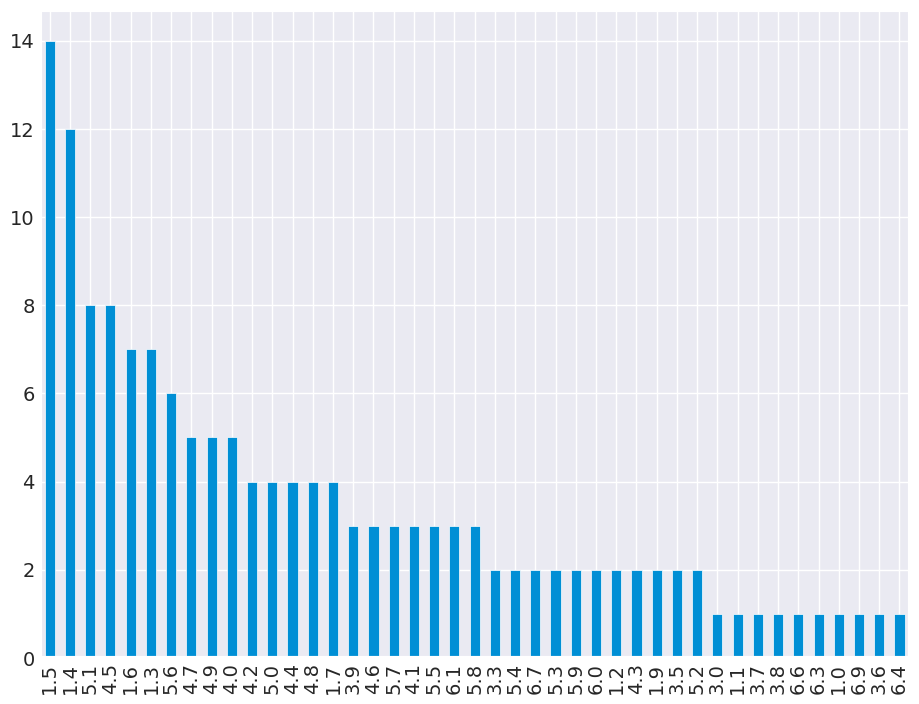

In [ ]:
df['petal_length'].nunique()
plt.figure(figsize=(10,8))
print(df['petal_length'].value_counts().to_frame())
df['petal_length'].value_counts().plot.bar()
plt.show()

# **Petal_width**

     petal_width
0.2           28
1.3           13
1.8           12
1.5           12
1.4            8
2.3            8
1.0            7
0.4            7
0.3            7
0.1            6
2.1            6
2.0            6
1.2            5
1.9            5
1.6            4
2.5            3
2.2            3
2.4            3
1.1            3
1.7            2
0.6            1
0.5            1


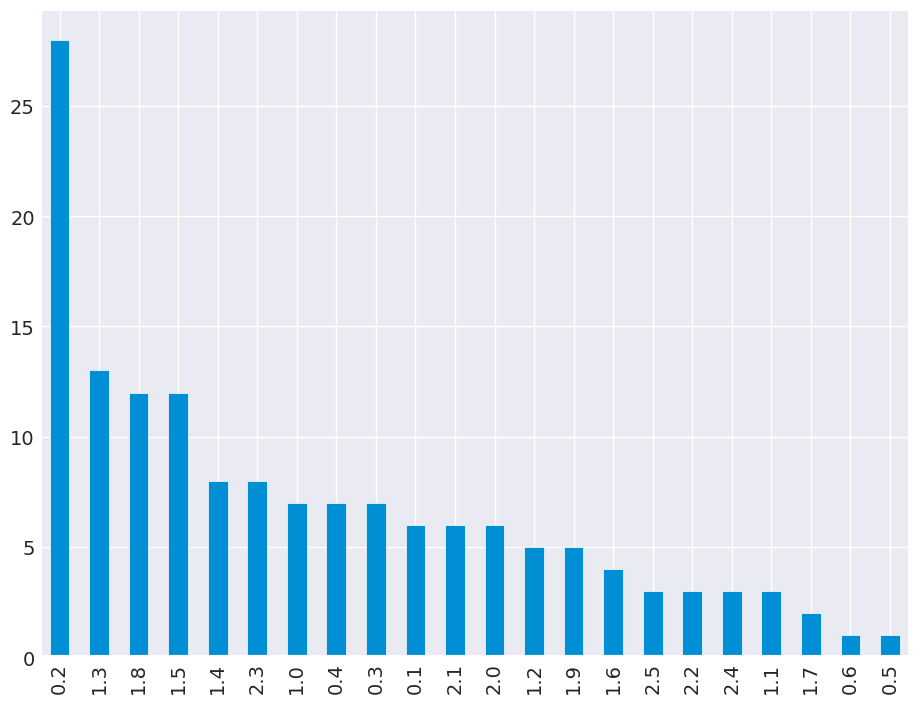

In [ ]:
df['petal_width'].nunique()
plt.figure(figsize=(10,8))
print(df['petal_width'].value_counts().to_frame())
df['petal_width'].value_counts().plot.bar()
plt.show()

# **Species**

In [ ]:
df['species'].nunique()

3

In [ ]:
df['species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

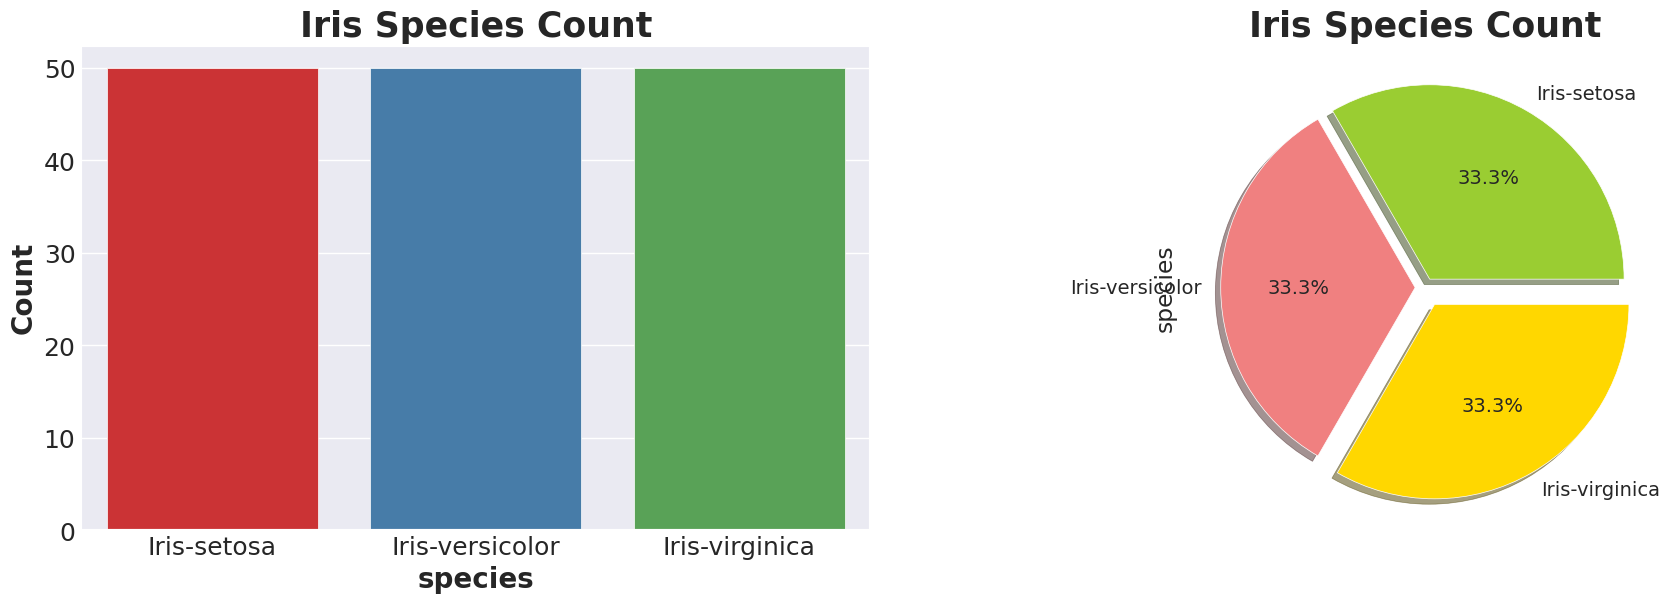

In [ ]:
#Species
import seaborn as sns

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
sns.countplot(x='species',data=df, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=25)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('species', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')

plt.subplot(1,2,2)
df['species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=25)

plt.show()

<Figure size 2000x800 with 0 Axes>

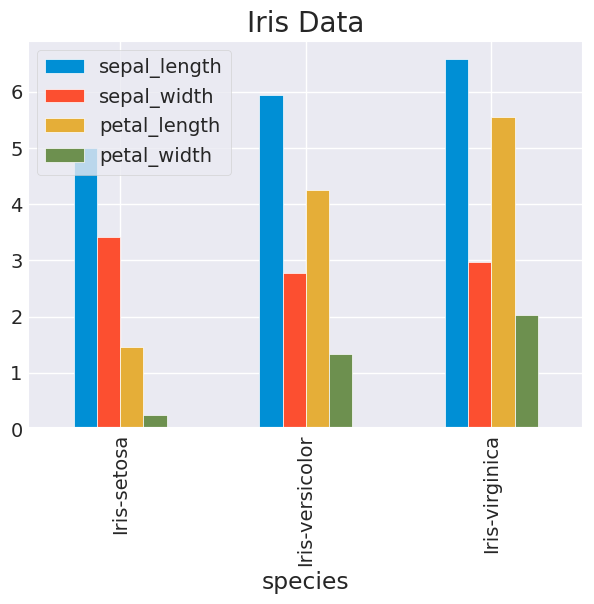

In [ ]:
df_Species = df.groupby(df['species']).mean()
plt.figure(figsize=(20,8))
df_Species.plot.bar()
plt.title('Iris Data')
plt.show()

# **Clean the data**

## **Identify Duplicate Values**

In [ ]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

In [ ]:
df.duplicated().any()

False

## **Missing Values**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# **Analysis of Relationship between variables**

## **Correlation between feature**

The correlation between the continuos variables

a. Pearson Correlation

b. Spearman Correlation

c. kendall

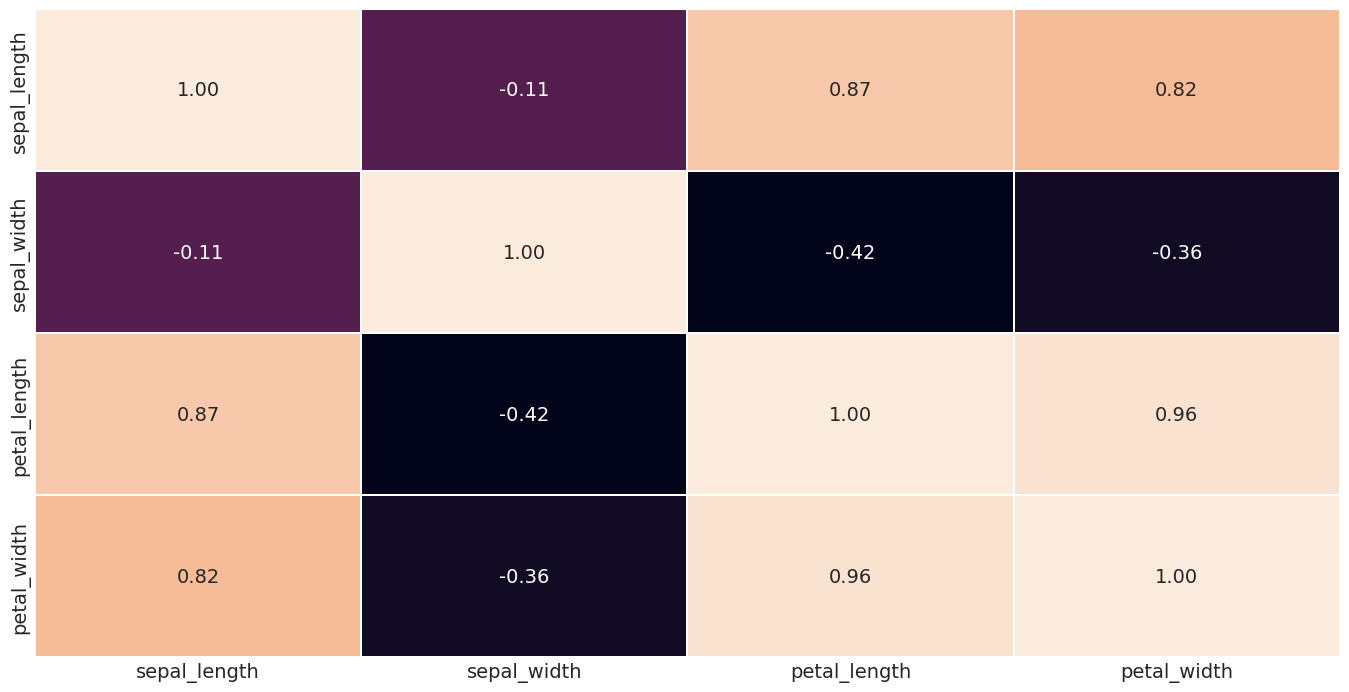

In [ ]:
# Pearson Correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.2f', linewidth=0.2);

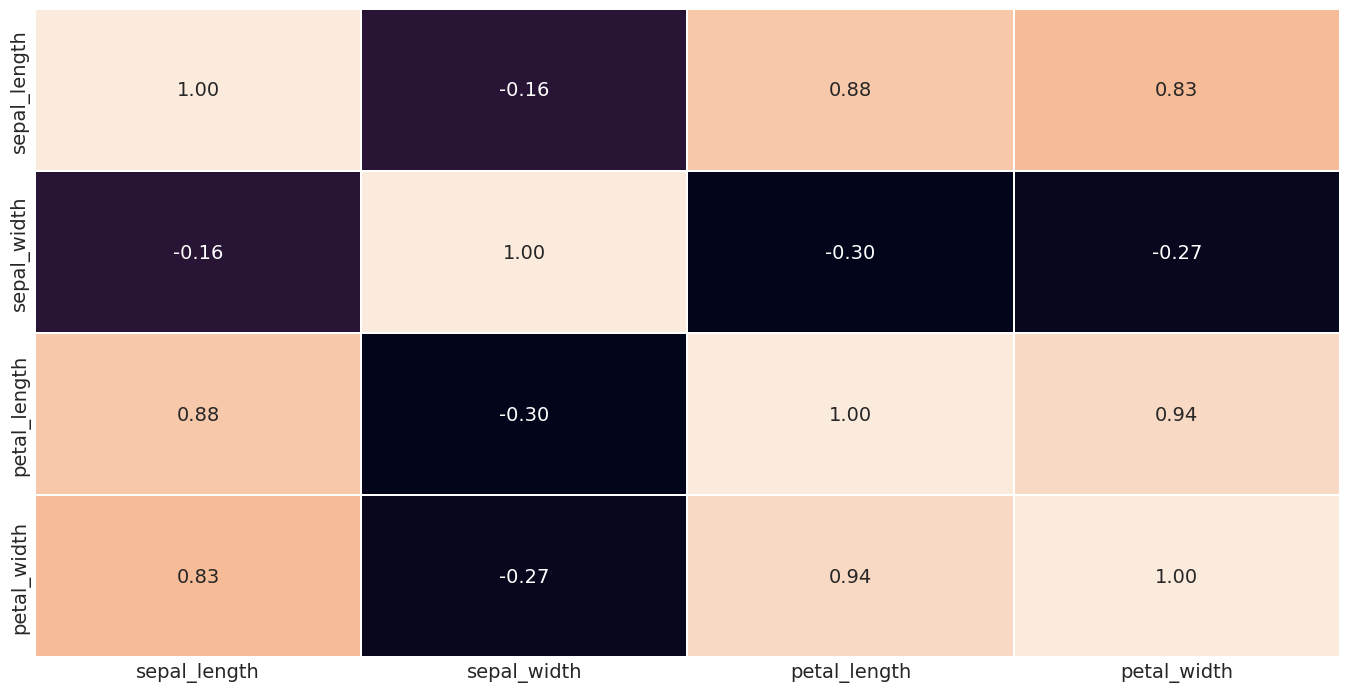

In [ ]:
# Spearman Correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method='spearman'), cbar=False, annot=True, fmt='.2f', linewidth=0.2);

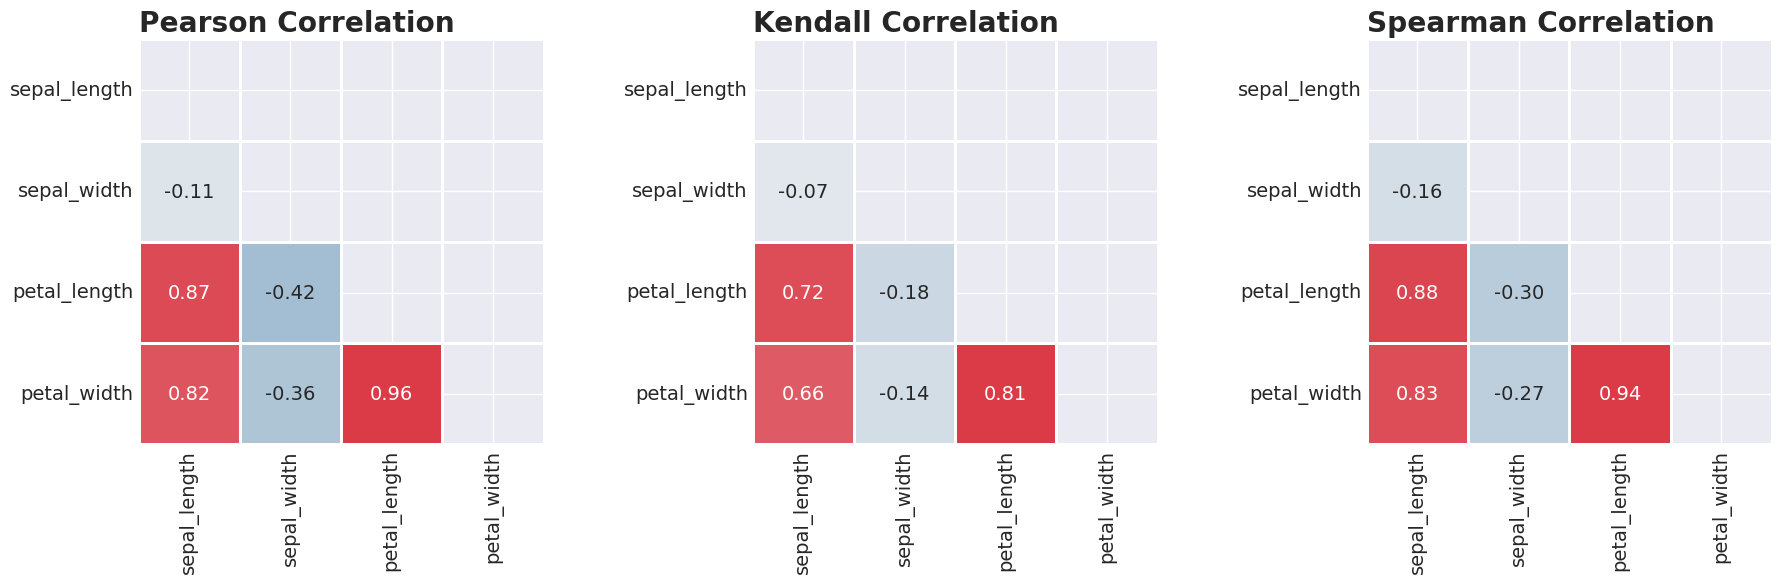

In [ ]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(20 , 5))

feature_lst = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

corr = df[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(df[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           )
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')

plt.show()

# **The correlation between continuos features and target**


In [ ]:
df.corr()['petal_width']

sepal_length    0.817058
sepal_width    -0.356376
petal_length    0.961883
petal_width     1.000000
Name: petal_width, dtype: float64

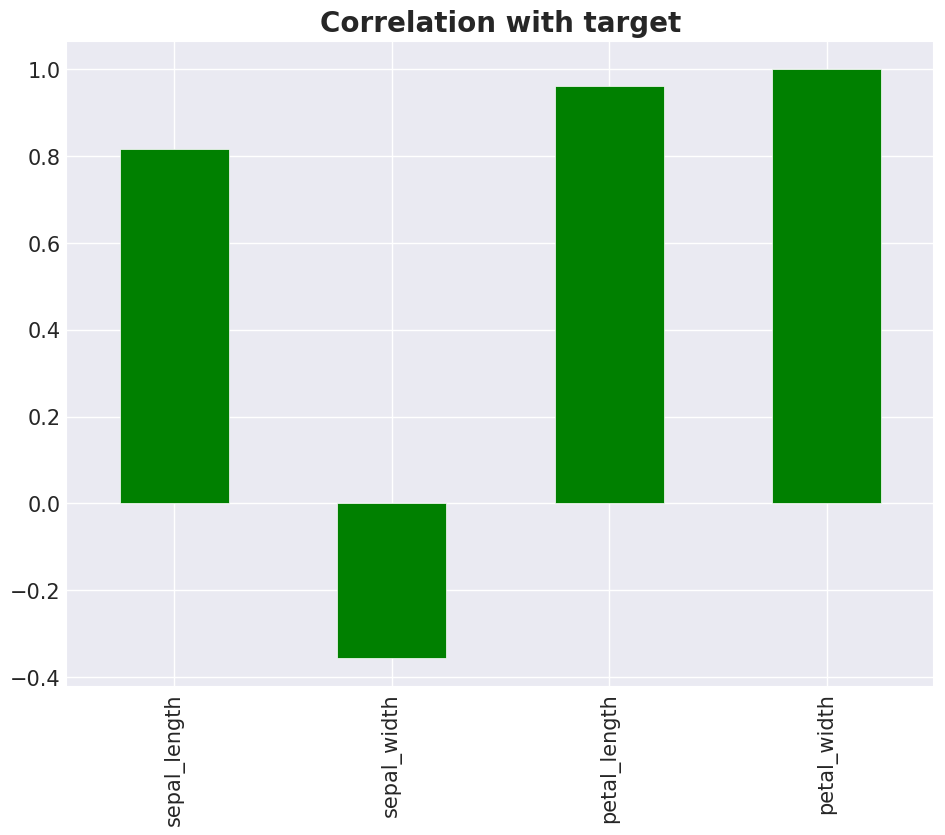

In [ ]:
a = df.drop('species', axis=1)
a.corrwith(df['petal_width']).plot(kind='bar', grid=True, figsize=(10,8), color='green')
plt.title("Correlation with target", fontweight='bold', size=20)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)
plt.show()

# **Outliers**

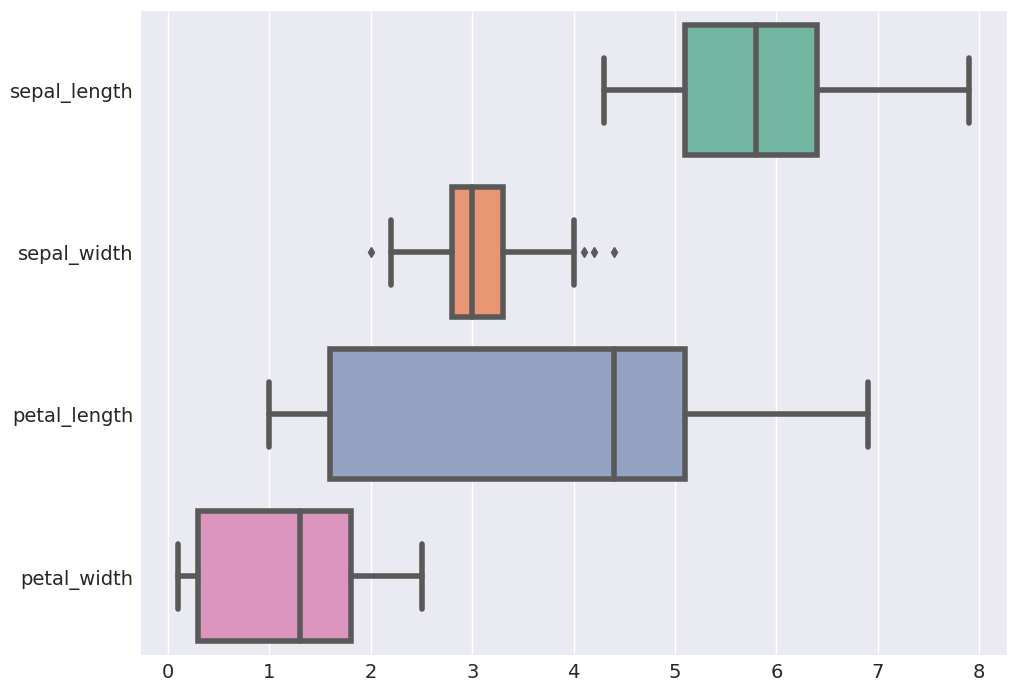

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, orient='h', palette='Set2');

# **Skewness and Kurtsis**

In [ ]:
df.skew().sort_values(ascending=True)

petal_length   -0.293763
petal_width    -0.113479
sepal_length    0.292560
sepal_width     0.324351
dtype: float64

# **Data Visualization**

# a. Univariate Analysis

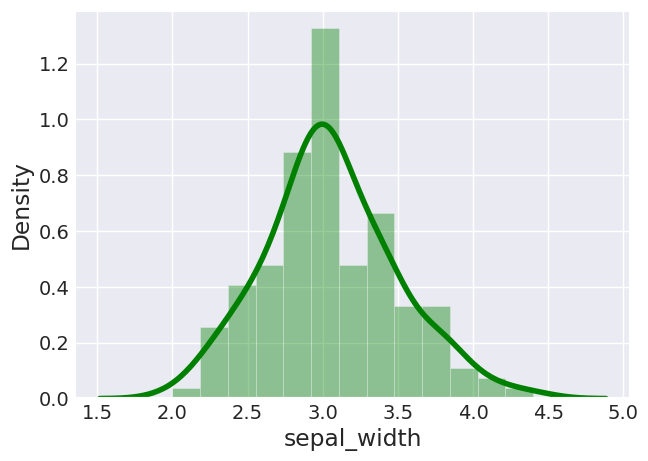

In [ ]:
sns.distplot(df.sepal_width, color = 'green')
plt.show()

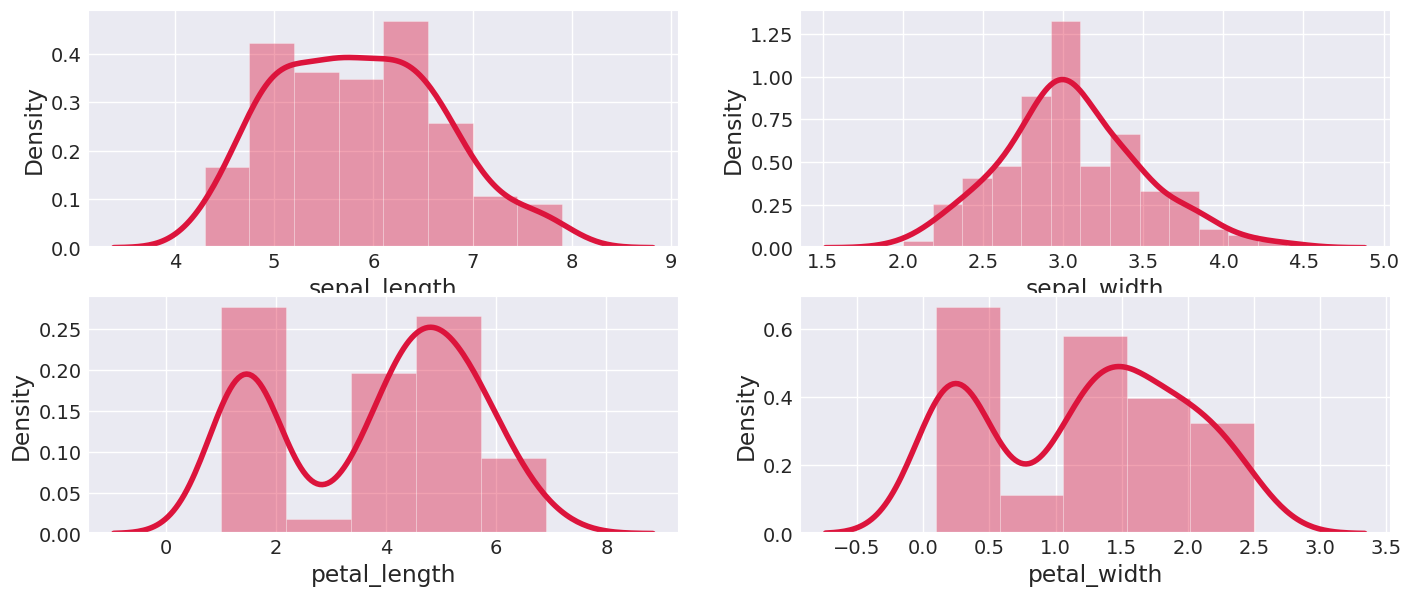

In [ ]:
plt.figure(figsize = (15,10))
feature = df.columns[0:4]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')

# **Bivariate Analysis**

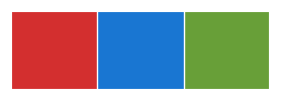

In [ ]:
# Setting color palette
colors = ['#D32F2F','#1976D2','#689F38']
sns.palplot(sns.color_palette(colors))

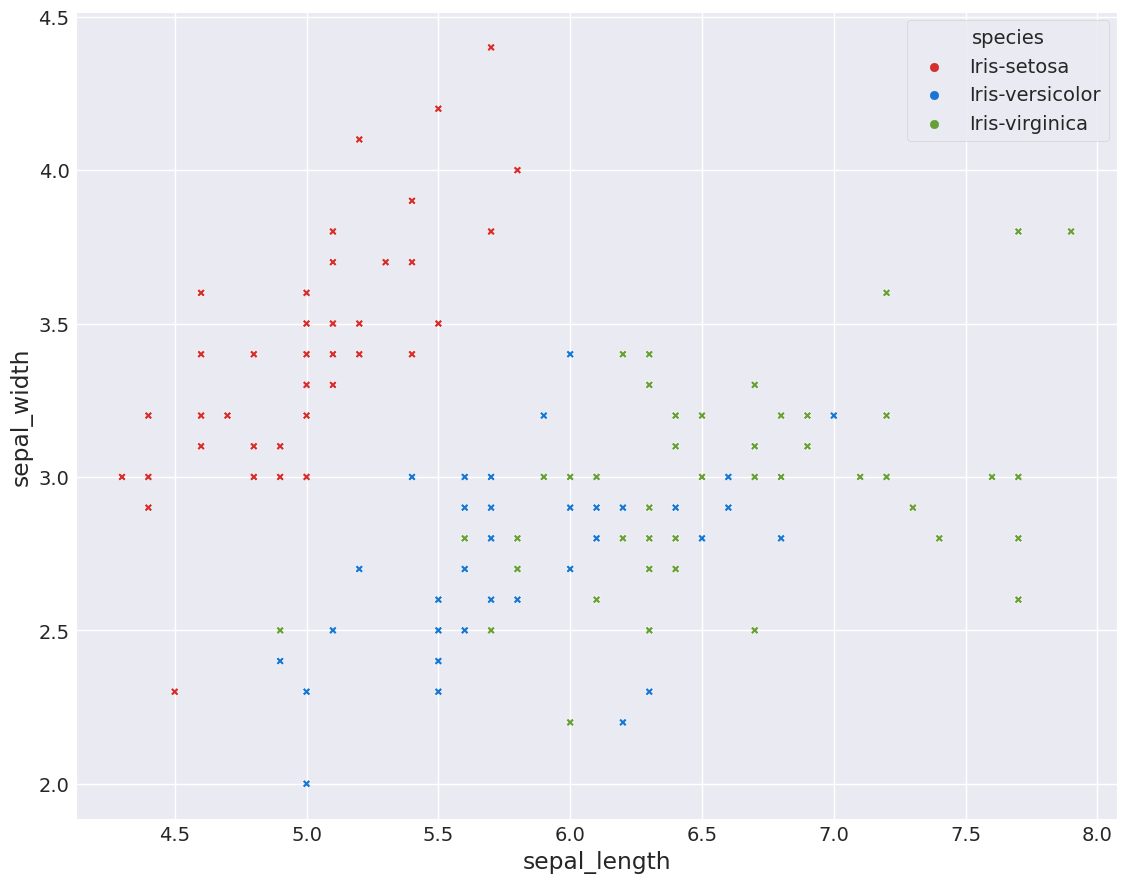

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df, palette=colors, marker="X")
plt.show()

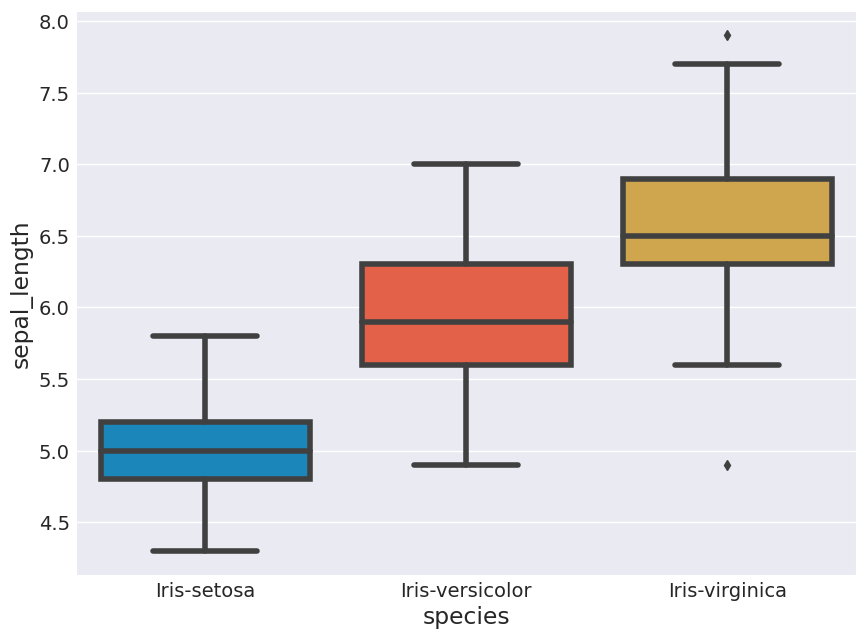

In [ ]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df, x='species', y='sepal_length')
plt.show()

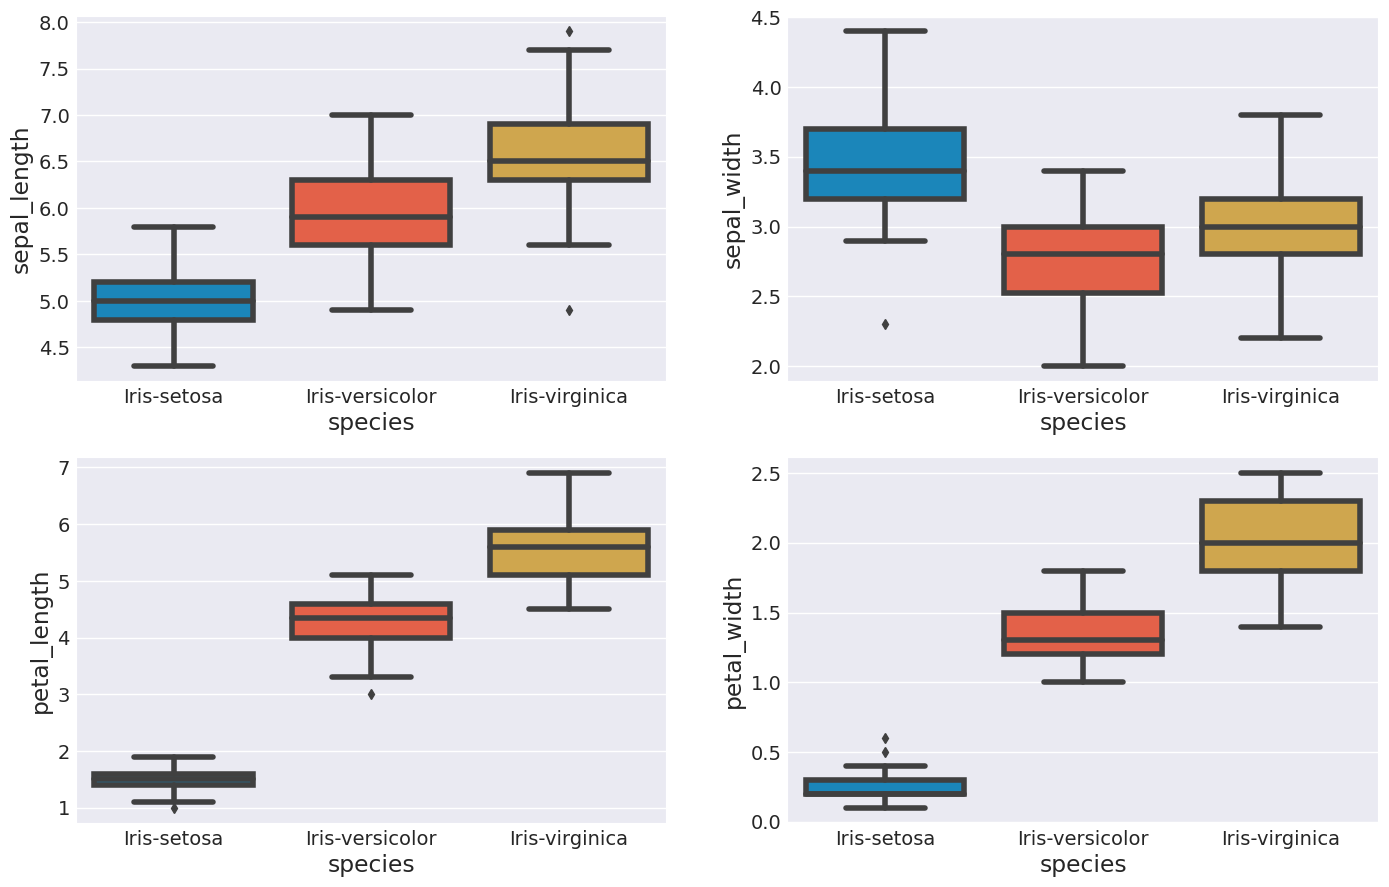

In [ ]:
# Boxplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species', y='sepal_length', data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species', y='sepal_width', data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species', y='petal_length', data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species', y='petal_width', data=df)
plt.show()

# **Multivariate Analysis**

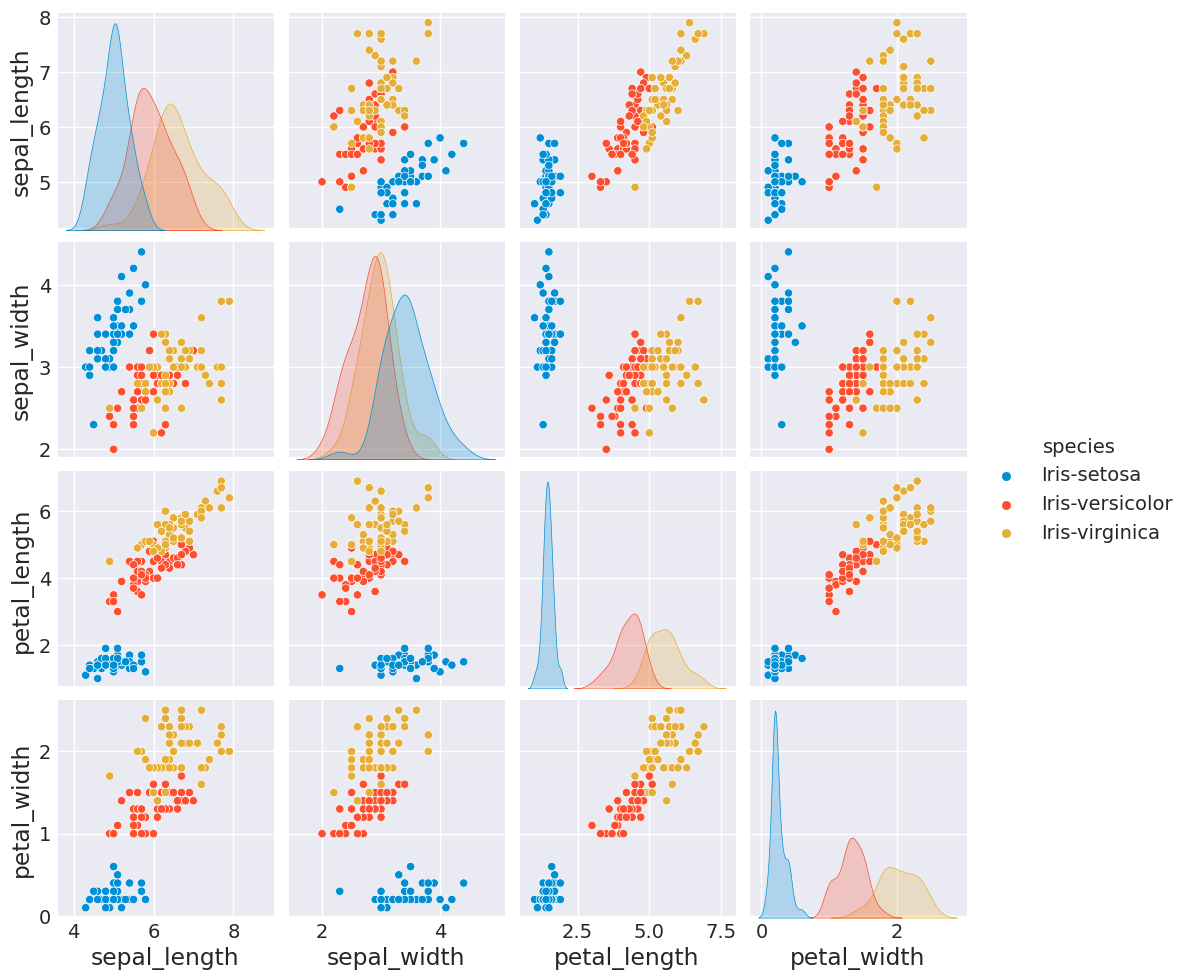

In [ ]:
# Pairplot
sns.pairplot(df, hue='species')
plt.show()

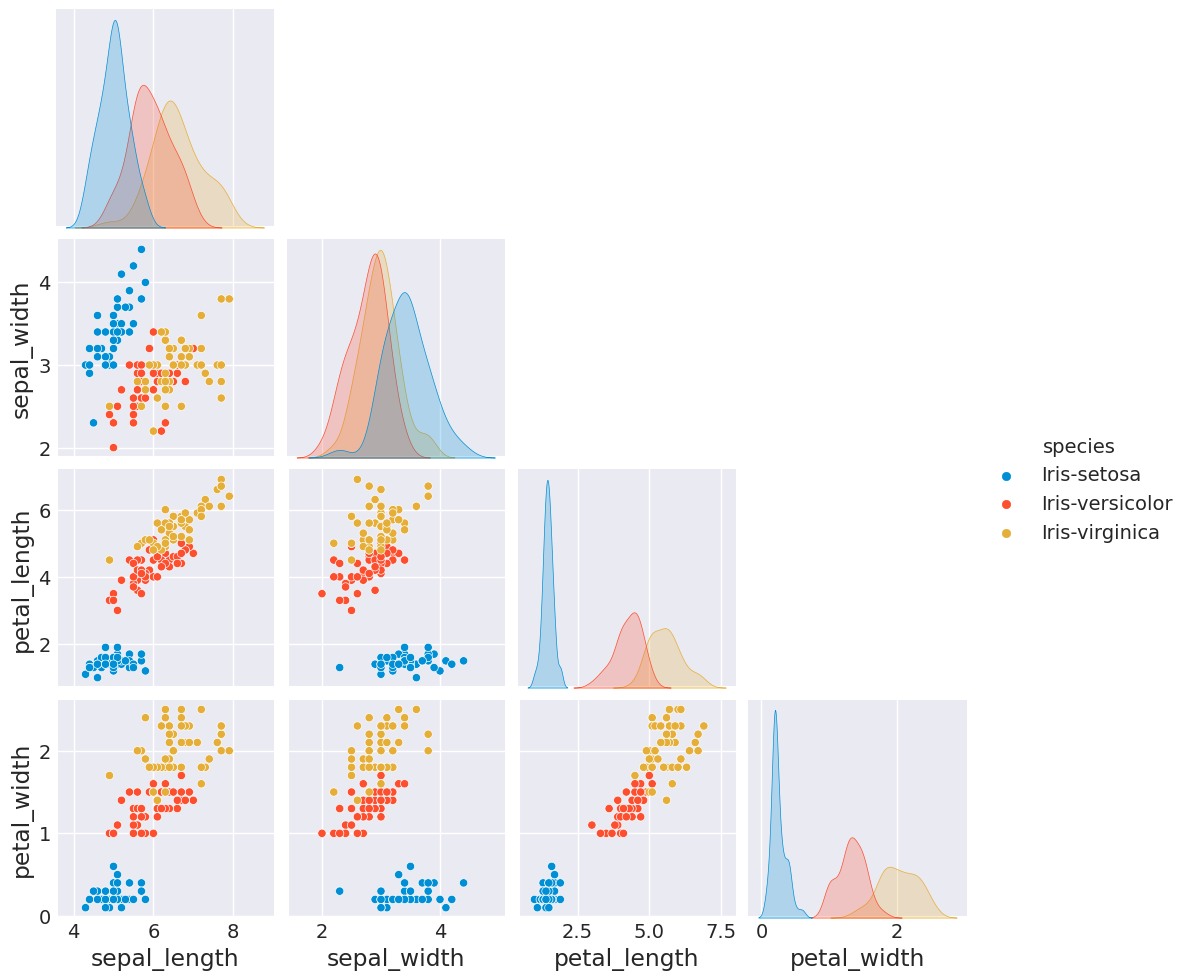

In [ ]:
# Pairplot
sns.pairplot(df, hue='species', corner=True)
plt.show()

After graphing the features in a pair plot, it is clear that the
relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.

There is some overlap in the pairwise relationships of the other
two species, iris-versicolor (brown) and iris-virginica (green).

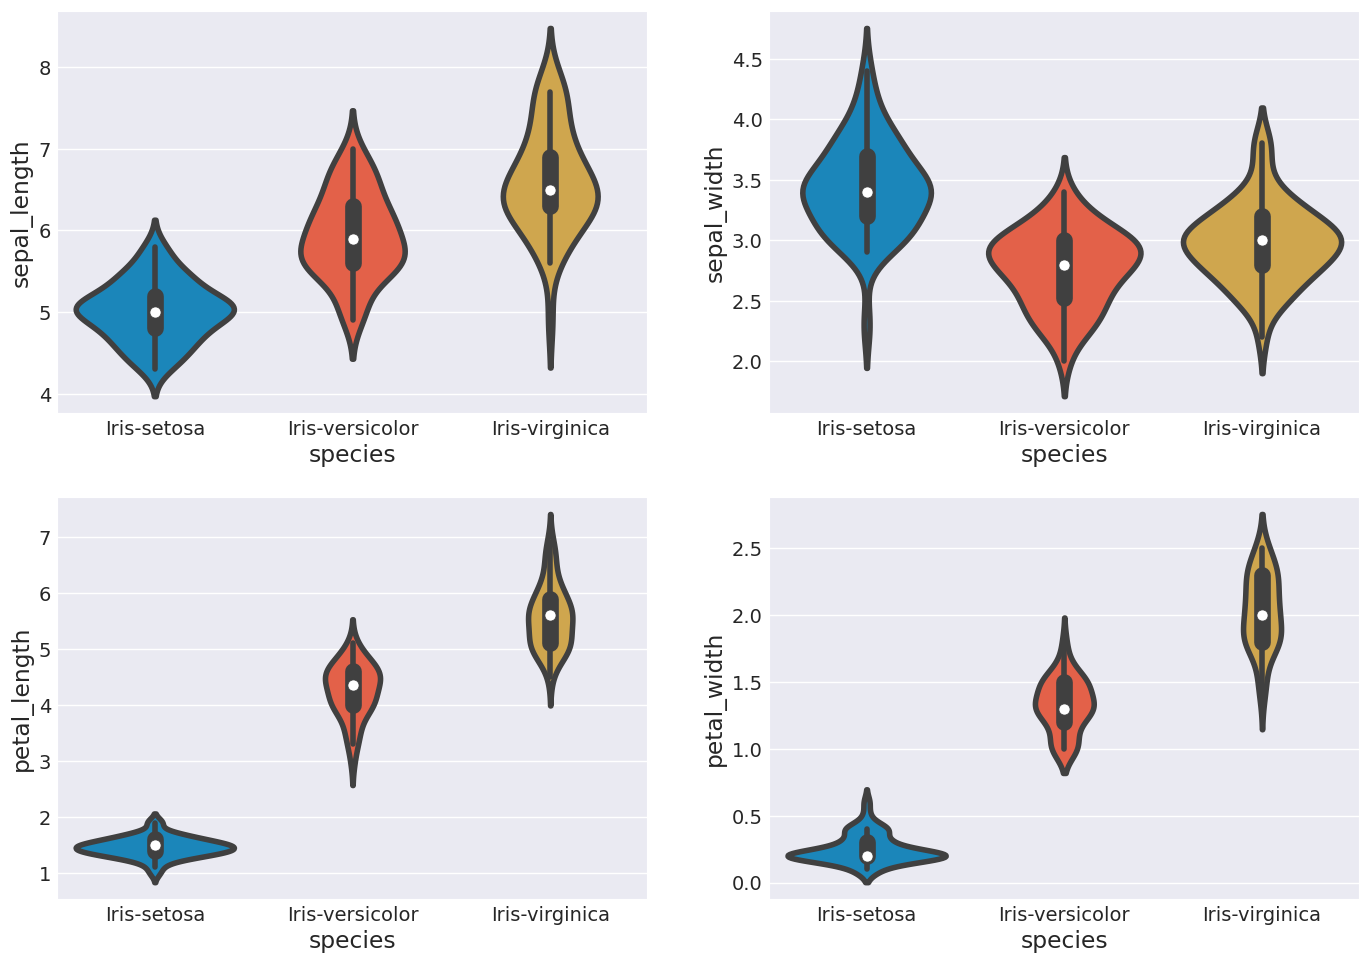

In [ ]:
plt.figure(figsize=(15,11));
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=df);

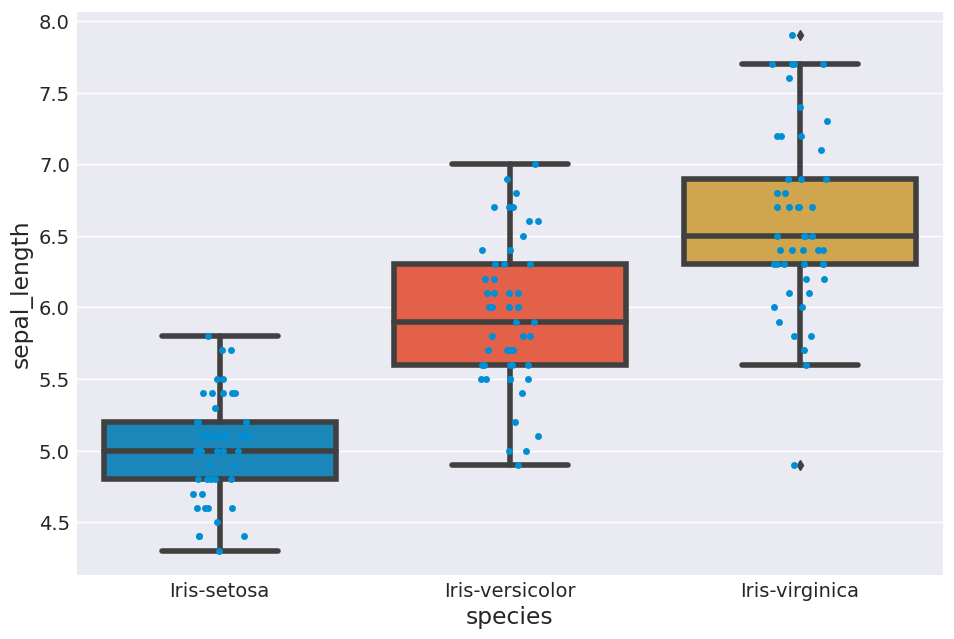

In [ ]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species', y='sepal_length',data=df)
fig=sns.stripplot(x='species', y='sepal_length',data=df, jitter=True, edgecolor='gray')

# **Modeling**

In [ ]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(117, 4) (30, 4) (117,) (30,)


# **USING KNN**(K Nearest Neighbors)

In [ ]:
list_1=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds = knn.predict(x_test)
    scores = accuracy_score(y_test,preds)
    list_1.append(scores)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)

knn.fit(X_train2, y_train)


KNeighborsClassifier(n_neighbors=3)

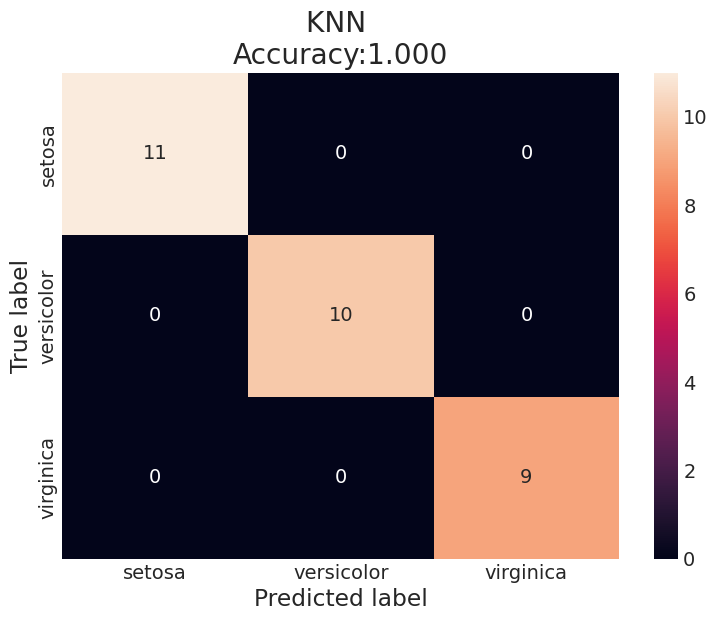

In [ ]:
cm = confusion_matrix(y_test, preds)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(accuracy_score(y_test, preds))
print('\n')
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

1.0


[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

